<a href="https://colab.research.google.com/github/Rossa53/kaggle-project/blob/main/24004171_Rossalwani_Najwa_Deraman_Data_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GLOBAL AI JOB MARKET AND SALARY TRENDS 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)


In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/Rossa53/kaggle-project/refs/heads/main/ai_job_dataset.csv')
pd.set_option('display.max_columns', None)
df.head(20)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

DESCRIPTIVE ANALYTICS - SUMMARIZING AND VISUALIZING BASIC TRENDS LIKE SALARY DISTRIBUTIONS AND TOP 10 JOB TITLES

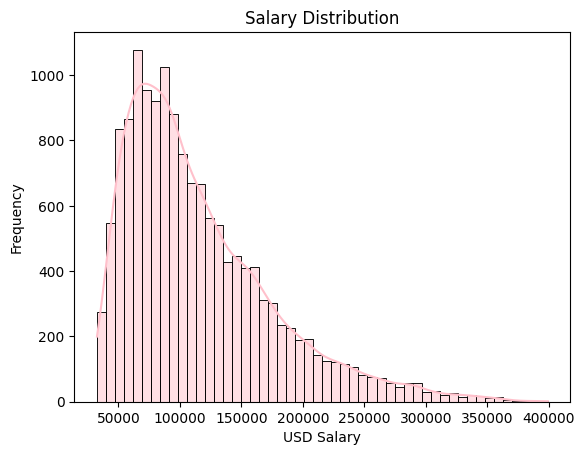

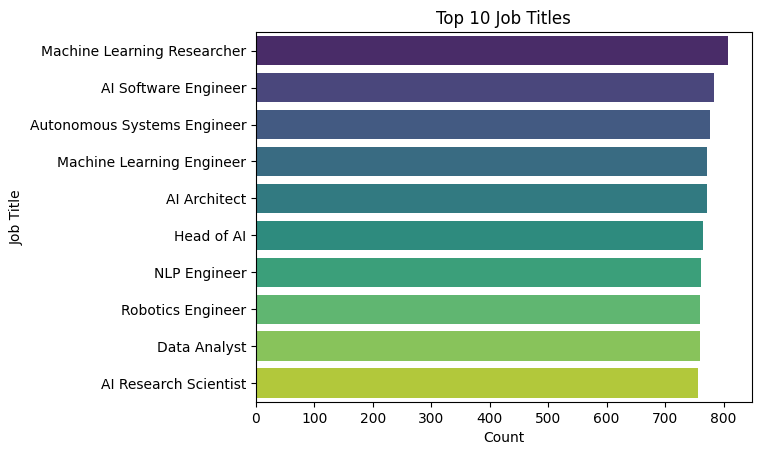

In [32]:
#DESCRIPTIVE ANALYTICS

#Salary Distribution
sns.histplot(df['salary_usd'],
bins=50, kde=True,
color='pink')
plt.title('Salary Distribution')
plt.xlabel('USD Salary')
plt.ylabel('Frequency')
plt.show()

#Top 10 job Titles
top_job_titles = df['job_title'].value_counts().head(10)
sns.barplot(y=top_job_titles.index, x=top_job_titles.values,
palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

DIAGNOSTIC ANALYTICS - UNCOVERING PATTERNS, ANOMALIES AND CORRELATIONS BETWEEN SALARY_USD, YEARS_EXPERIENCE, REMOTE_RATIO, JOB_DESCRIPTION_LENGTH AND BENEFITS_SCORE. UNDERSTANDING THE DIFFERENCES IN SALARY BASED ON THE EXPERIENCE LEVELS.

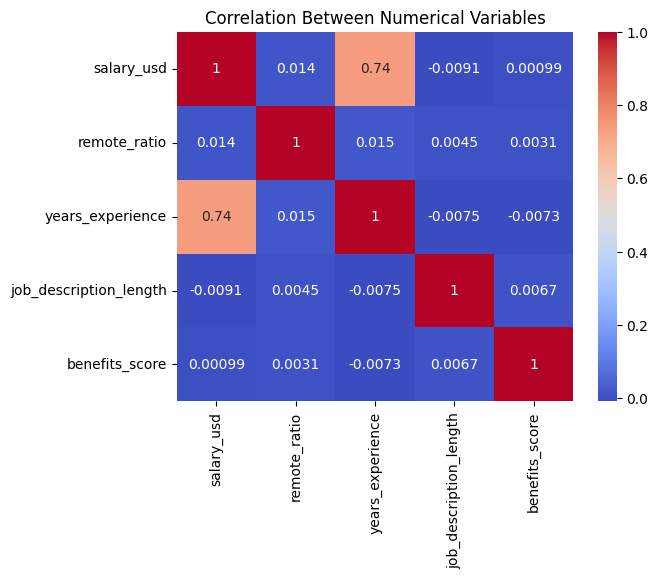

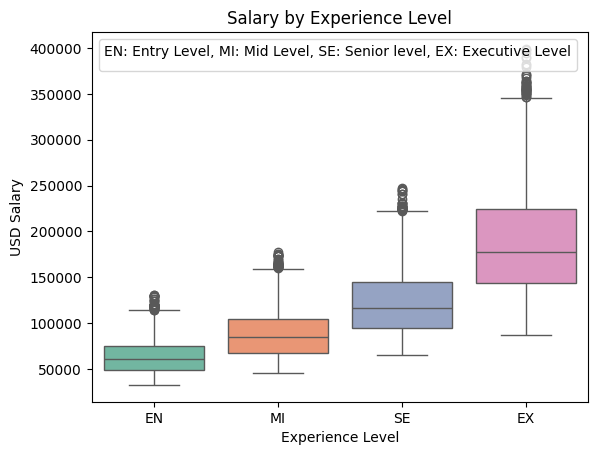

In [25]:
#DIAGNOSTIC ANALYTICS

#Correlation Heatmap
numeric_cols = df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Variables')
plt.show()

#Define custom order for experience levels
experience_level_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(df['experience_level'], categories=experience_level_order, ordered=True)

#Salary vs. Experience Level
sns.boxplot(x='experience_level', y='salary_usd', data=df,
palette='Set2')
plt.legend(title='EN: Entry Level, MI: Mid Level, SE: Senior level, EX: Executive Level', loc= 'upper left')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('USD Salary')
plt.show()

PREDICTIVE ANALYTICS - USE MODEL TO FORECAST FUTURE SALARIES BASED ON HISTORICAL DATA, STATISTICAL ALGORITHMS, AND MACHINE LEARNING TECHNIQUES

R2 Score: 0.56
Mean Squared Error: 1621364883.6


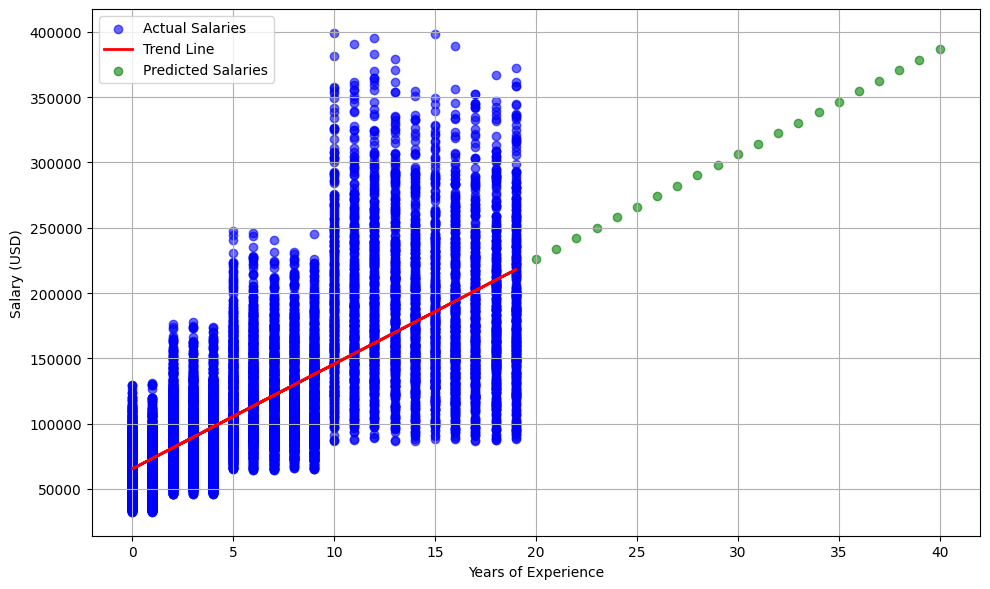

In [7]:
#PREDICTIVE ANALYTICS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load and prepare the dataset
#Load csv
df = pd.read_csv('https://raw.githubusercontent.com/Rossa53/kaggle-project/refs/heads/main/ai_job_dataset.csv')

#Filter only the required columns
df_exp = df[['years_experience', 'salary_usd']].dropna()

#Remove outliers
df_exp = df_exp[df_exp['years_experience'] < 40]
df_exp = df_exp[df_exp['salary_usd'] < 400000]

#Train a regression model
#Features and target
X = df_exp[['years_experience']]
y = df_exp['salary_usd']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on test set
y_pred = model.predict(X_test)

#Evaluation
print('R2 Score:', round (r2_score(y_test, y_pred),2))
print('Mean Squared Error:', round (mean_squared_error(y_test, y_pred),2))

#Predict Future Salaries by Years of Experience
#Simulate years from 20 to 40
future_years = pd.DataFrame({'years_experience': list(range(20,41))})

#Predict future salaries
future_salaries = model.predict(future_years)

#Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Salaries', alpha=0.6)
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Trend Line')
plt.scatter(future_years, future_salaries, color='green', label='Predicted Salaries', alpha=0.6)
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PRESCRIPTIVE ANALYTICS - RECOMMENDING UPSKILLING OR MAINTAINING ROLE BY EXPERIENCE LEVEL

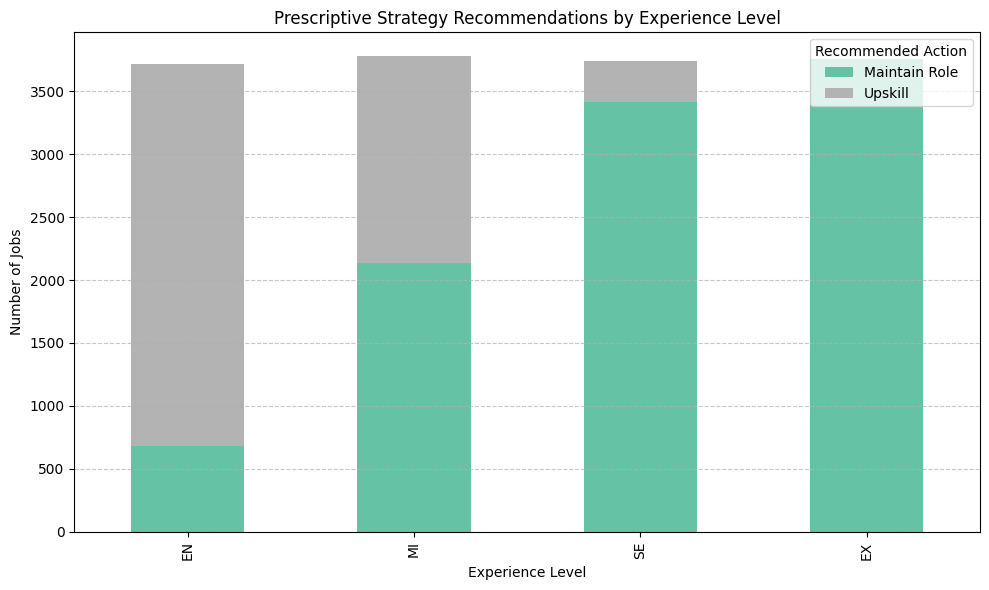

In [6]:
import pandas as pd

#Load csv
df = pd.read_csv('https://raw.githubusercontent.com/Rossa53/kaggle-project/refs/heads/main/ai_job_dataset.csv')
df.dropna(inplace=True)

#Define a prescriptive rule
#Select relevant features
df_prescriptive = df[['experience_level', 'remote_ratio', 'salary_usd']].dropna()

#Rule: If salary < 80,000 - Recommend 'Upskill'
#Else - Recommend 'Maintain Role'

df_prescriptive['strategy'] = df_prescriptive['salary_usd'].apply(lambda x: 'Upskill' if x < 80000 else 'Maintain Role')

#Visualize recommendations by Experience Level
import matplotlib.pyplot as plt
#Group by experience level and strategy
strategy_counts = df_prescriptive.groupby(['experience_level', 'strategy']).size().unstack(fill_value=0)

#Define custom orderfor experience levels
experience_level_order = ['EN', 'MI', 'SE', 'EX']
strategy_counts = strategy_counts.reindex(experience_level_order)

#Plot
strategy_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Prescriptive Strategy Recommendations by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.legend(title='Recommended Action')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()